# Environmental Analytics Lab 5
# Geometric Operations
## Semester 2, 2022-23
## Dr. Bianca Schoen-Phelan
Based on Geopandas documentation and others, see lecture notes.

**Task**: 

Run the cells that contain examples (either by using the play button or by typeing `shift+Enter`). Do the exercises that are marked with "**Task**".

In [6]:
# installs
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
# Import the necessary libraries import geopandas
import geopandas as gpd
import shapely.geometry
import matplotlib.pyplot as plt

In [8]:
# mount google drive
# Data folder Borough Boundaries
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#New York Boroughs
We are going start off with continuing on last week's topic, which is to deepen our understanding of some spatial operations.

GeoPandas actually comes with several pre-installed data sets that can be used for training purposes. Today, we will be using the New York Boroughs dataset.

In [9]:
# display the available built-in datasets
gpd.datasets.available

['naturalearth_cities', 'naturalearth_lowres', 'nybb']

The following built-in datasets are available:

*  naturalearth_lowres: A dataset containing low resolution world map data from the Natural Earth project. This dataset includes polygons for countries and oceans, as well as points for major cities.
*  naturalearth_cities: A dataset containing information about the world's major cities, including their names, locations, and populations.
*  nybb: A dataset containing the boundaries of the five boroughs of New York City.

In [10]:
# we can read built-in datasets using the .get_path function
path_to_data = gpd.datasets.get_path("nybb")

# the .read_file function you already know
nybb = gpd.read_file(path_to_data)

# then we will have a look into the file
nybb

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227...."
1,4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957..."
2,3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100..."
3,1,Manhattan,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940...."
4,2,Bronx,464392.991824,1.186925e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278..."


Let's start our usual initial investigation about the file in order to understand the file and the file's content better. This should be your first step in any investigation you are doing.

In [11]:
nybb.crs

<Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

Check this CRS code out on [epsg.org](https://epsg.org/home.html) if you don't know it yet.

In [12]:
# some good practice
# this helps if you need to transform your dataset later.
# It will always make it clear to you which version
# of your dataset you are currently working with.
nybb_2263 = nybb.copy()

In [13]:
# the .shape attribute tells us how many rows and columns the dataset has
nybb_2263.shape

(5, 5)

In [14]:
# the .dtypes attribute tells us the data types that are stored.
nybb_2263.dtypes

BoroCode         int64
BoroName        object
Shape_Leng     float64
Shape_Area     float64
geometry      geometry
dtype: object

BoroName is of type object. If you wanted to do any string operations with this you'd have to first convert this data type into a string data type.

In [15]:
# look at the output of nybb_2263 earlier. The index
# was just a number from 0-4. It is a nice idea to
# change the index to something meaningful.
# This operation only makes sense if you have a column
# with distinct values.
nybb_2263 = nybb_2263.set_index('BoroName')

In [16]:
# check that it worked. Compare to above
nybb_2263

,BoroCode,Shape_Leng,Shape_Area,geometry
BoroName,,,,
Staten Island,5,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227...."
Queens,4,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957..."
Brooklyn,3,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100..."
Manhattan,1,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940...."
Bronx,2,464392.991824,1.186925e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278..."


The .buffer function returns a GeoSeries of geometries representing all points within a given distance of each geometric object. The unit used will be the unit that is defined in the CRS, so it's important that you know what unit your CRS uses. 2263 is a projected dataset using feet. You can retrieve this information from the epsg.org website.

Buffer creates an envelope of space around selected features in a vector data. It is sometimes referred to as a zone of a specified distance around a polygon, line, or point feature. Buffering is often used for proximity analysis. Such a buffer could be used later on to examine the extent of farmland or sampling points within the buffer.

In [17]:
# buffer of 10,000 feet
# the output of buffer and centroid are saved in new columns
nybb_2263["buffered"] = nybb_2263.buffer(10000) 
nybb_2263['centroid'] = nybb_2263.centroid 

In [18]:
# check that it is all as expected
nybb_2263

,BoroCode,Shape_Leng,Shape_Area,geometry,buffered,centroid
BoroName,,,,,,
Staten Island,5,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227....","POLYGON ((903234.894 123347.784, 903178.057 12...",POINT (941639.450 150931.991)
Queens,4,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957...","POLYGON ((1066963.473 157602.686, 1067059.264 ...",POINT (1034578.078 197116.604)
Brooklyn,3,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100...","POLYGON ((962679.120 165570.385, 962651.330 16...",POINT (998769.115 174169.761)
Manhattan,1,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940....","POLYGON ((980499.119 178448.735, 979864.868 17...",POINT (993336.965 222451.437)
Bronx,2,464392.991824,1.186925e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278...","POLYGON ((992724.911 240962.362, 992700.941 24...",POINT (1021174.790 249937.980)


In [19]:
# let's select a part of NYC and do some further analysis on it
brooklyn = nybb_2263.loc["Brooklyn", "geometry"]

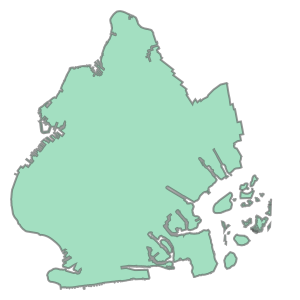

In [20]:
# plot the polygon
brooklyn

In [21]:
# remind us of the data type
type(brooklyn)

shapely.geometry.multipolygon.MultiPolygon

Does the buffered region intersect with it?

In [22]:
nybb_2263["buffered"].intersects(brooklyn)

BoroName
Staten Island     True
Queens            True
Brooklyn          True
Manhattan         True
Bronx            False
dtype: bool

Bronx is very far away from the Brooklyn, it appears from this a buffer area of 10,000 feet beyond the boundary does not intersect Brooklyn at all. 

Another question is if the centroids are contained in their respective boroughs (ie. unique centroids)? Remember, that the `.centroid` operation does not mean that the centre of mass is always located within the feature. For convex polygons the centroid will always be inside, but this is not the case for all types of polygons.

In [23]:
nybb_2263["centroid"].within(brooklyn)

BoroName
Staten Island    False
Queens           False
Brooklyn          True
Manhattan        False
Bronx            False
dtype: bool

Very good. Brooklyn's centroid is within Brooklyn.

##Task 1
Last week you have learnt about the `apply` statement and `lambda`. Write an `apply` statement over the `nybb_2263` GeoDataFrame that checks the `within` operator from above for every row in the dataset.

In [24]:
# your code goes here
# all results should return True in this example spreadsheet - I say
# that because I've already run the code. If you are running it on an
# unknown dataset, you wouldn't necessarily know that, depending on the
# shape of your polygon the centroid might not be inside.

In [25]:
nybb_2263.apply(lambda row: row['centroid'].within(row.geometry), axis=1)


BoroName
Staten Island    True
Queens           True
Brooklyn         True
Manhattan        True
Bronx            True
dtype: bool

# Spatial Joins
Spatial joins are a very common operation between two datasets. We will generate an artificial dataset of bus stops to illustrate and then move on to something more substantial.

In [26]:
# Generate some 'bus stops'

bus_stops = [int(x) for x in nybb_2263.total_bounds]
amount = 6

point_df = gpd.GeoDataFrame([
    {'geometry': shapely.geometry.Point(x, y), 'value1': x + y, 'value2': x - y}
    for x, y in zip(range(bus_stops[0], bus_stops[2], int((bus_stops[2] - bus_stops[0]) / amount)),
                    range(bus_stops[1], bus_stops[3], int((bus_stops[3] - bus_stops[1]) / amount)))])
# Make sure they're using the same projection reference
point_df.crs = nybb_2263.crs

In [27]:
# plot
point_df

,geometry,value1,value2
0,POINT (913175.000 120121.000),1033296,793054
1,POINT (938876.000 145574.000),1084450,793302
2,POINT (964577.000 171027.000),1135604,793550
3,POINT (990278.000 196480.000),1186758,793798
4,POINT (1015979.000 221933.000),1237912,794046
5,POINT (1041680.000 247386.000),1289066,794294
6,POINT (1067381.000 272839.000),1340220,794542


In [28]:
# remind ourselves what the data type is
type(point_df)

geopandas.geodataframe.GeoDataFrame

In [29]:
# check that the crs assignment has worked
point_df.crs

<Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

<Axes: >

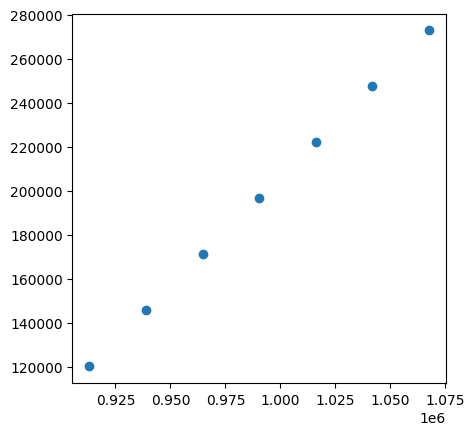

In [30]:
# let's plot
point_df.plot()

In [31]:
from geopandas.tools import sjoin


In [32]:
# Joining the NYC borough INTO the pointdf
sjoin(point_df, nybb_2263, how="left", op="intersects")
# The NaNs are the points that do not intersect with any borough

/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


,geometry,value1,value2,index_right,BoroCode,Shape_Leng,Shape_Area,buffered,centroid
0,POINT (913175.000 120121.000),1033296,793054,NaN,NaN,NaN,NaN,None,None
1,POINT (938876.000 145574.000),1084450,793302,Staten Island,5.0,330470.010332,1.623820e+09,"POLYGON ((903234.894 123347.784, 903178.057 12...",POINT (941639.450 150931.991)
2,POINT (964577.000 171027.000),1135604,793550,NaN,NaN,NaN,NaN,None,None
3,POINT (990278.000 196480.000),1186758,793798,NaN,NaN,NaN,NaN,None,None
4,POINT (1015979.000 221933.000),1237912,794046,NaN,NaN,NaN,NaN,None,None
5,POINT (1041680.000 247386.000),1289066,794294,NaN,NaN,NaN,NaN,None,None
6,POINT (1067381.000 272839.000),1340220,794542,NaN,NaN,NaN,NaN,None,None


If you are not interested in the NaN values, just perform an inner join instead.

In [33]:
sjoin(point_df, nybb_2263, how="inner", op="intersects")


/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


,geometry,value1,value2,index_right,BoroCode,Shape_Leng,Shape_Area,buffered,centroid
1,POINT (938876.000 145574.000),1084450,793302,Staten Island,5,330470.010332,1.623820e+09,"POLYGON ((903234.894 123347.784, 903178.057 12...",POINT (941639.450 150931.991)


<Axes: >

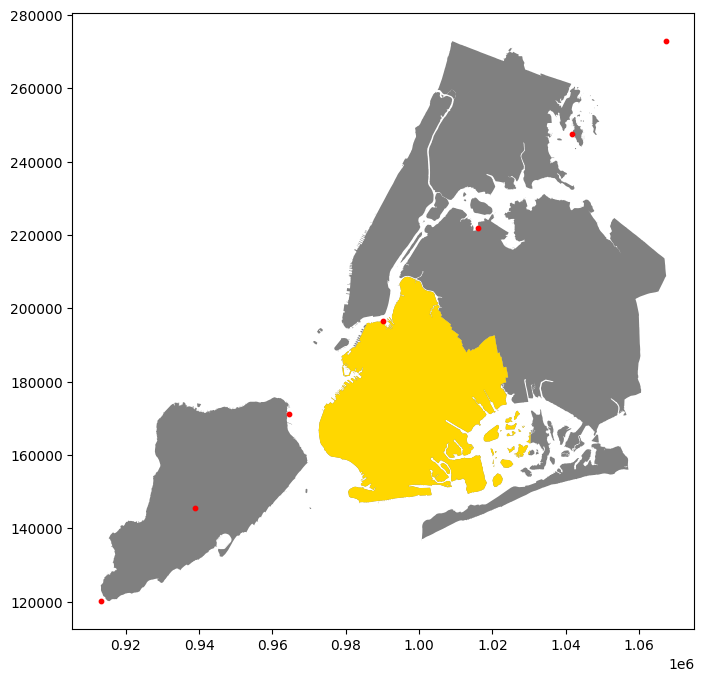

In [34]:
# let's visualise

# add the MultiPolygon to a GeoDataFrame
# this is necessary because you matplotlib won't visualise
# the shape, only DataFrames
gdf = gpd.GeoDataFrame(geometry=[brooklyn])

# Create a figure with one subplot
fig, ax = plt.subplots(figsize=(15,8))

# Plot the whole area
nybb_2263.plot(ax=ax, color='grey')
gdf.plot(ax=ax, color='gold')

# Plot points
point_df.plot(ax=ax, color='red', markersize=10)


## Task 2
Your `data_share` folder contains a folder called `OEM_NursingHomes`. Use this dataset to perform a spatial analysis similar to the example above.

In [35]:
# your code goes here

In [36]:
# read in nursing homes
nursing_homes_fp = '/content/drive/Othercomputers/Laptop/Documents/College/4th-Year/Environmental_Analytics/data_share/OEM_NursingHomes/OEM_NursingHomes_001.shp'

nursing_homes_shp = gpd.read_file(nursing_homes_fp)

In [37]:
# initial investigation
nursing_homes_shp.crs

<Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [38]:
# good practice
nursing_h_2263 = nursing_homes_shp.copy()

In [39]:
nursing_h_2263.shape

(177, 28)

In [40]:
nursing_h_2263.columns

Index(['Label', 'Name', 'Address', 'City', 'Zipcode', 'PFI', 'OpCert',
       'Capacity', 'Baseline', 'AIDS', 'AdultDay', 'AdultAIDS', 'Laboratory',
       'HealthFair', 'Radiology', 'LTS', 'Respite', 'Ventilator', 'OPOT',
       'OPPT', 'OPSP', 'Behavoiral', 'Coma', 'Pediatric', 'Brain', 'Ownership',
       'Borough', 'geometry'],
      dtype='object')

<Axes: >

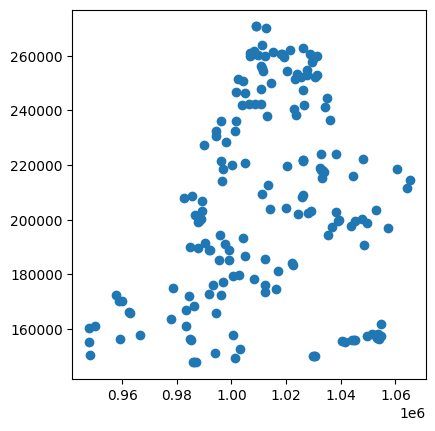

In [41]:
# let's have a look
nursing_h_2263.plot()

In [42]:
nursing_h_2263.head()

,Label,Name,Address,City,Zipcode,PFI,OpCert,Capacity,Baseline,AIDS,...,OPOT,OPPT,OPSP,Behavoiral,Coma,Pediatric,Brain,Ownership,Borough,geometry
0,BISHOP MUGAVERO,BISHOP FRANCIS J. MUGAVERO CENTER,155 DEAN STREET,BROOKLYN,11217,5546.0,7001377.0,288,1,0,...,0,0,0,0,0,0,0,Voluntary Corporation,3,POINT (987759.272 189445.048)
1,ROBERT MAPPLETHORPE,ROBERT MAPPLETHORPE RESIDENTIAL TREATMENT FACI...,327 EAST 17TH STREET,NEW YORK,10003,4807.0,7002351.0,28,1,1,...,0,0,0,0,0,0,0,Voluntary Corporation,1,POINT (989147.000 206680.000)
2,NY CRN,NY CENTER FOR REHAB & NURSING,26-13 21ST STREET,ASTORIA,11102,6384.0,7003405.0,280,1,0,...,0,0,0,0,0,0,0,Proprietary LLC,4,POINT (1004996.000 220781.000)
3,ATLANTIS,ATLANTIS REHAB AND RESIDENTIAL HEALTH CARE FAC...,140 ST EDWARDS STREET,BROOKLYN,11201,1405.0,7001389.0,400,1,0,...,0,0,0,0,0,0,0,Proprietary LLC,3,POINT (990372.000 191507.000)
4,BISHOP HUCLES,BISHOP HENRY B HUCLES NH,835 HERKIMER ST,BROOKLYN,11233,7069.0,7001379.0,240,1,0,...,0,0,0,0,0,0,0,Voluntary Corporation,3,POINT (1004838.000 186502.000)


In [43]:
# nursing homes in all areas
sjoin(nursing_h_2263, nybb_2263, how="inner", op="intersects")

/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


,Label,Name,Address,City,Zipcode,PFI,OpCert,Capacity,Baseline,AIDS,...,Brain,Ownership,Borough,geometry,index_right,BoroCode,Shape_Leng,Shape_Area,buffered,centroid
0,BISHOP MUGAVERO,BISHOP FRANCIS J. MUGAVERO CENTER,155 DEAN STREET,BROOKLYN,11217,5546.0,7001377.0,288,1,0,...,0,Voluntary Corporation,3,POINT (987759.272 189445.048),Brooklyn,3,741080.523166,1.937479e+09,"POLYGON ((962679.120 165570.385, 962651.330 16...",POINT (998769.115 174169.761)
3,ATLANTIS,ATLANTIS REHAB AND RESIDENTIAL HEALTH CARE FAC...,140 ST EDWARDS STREET,BROOKLYN,11201,1405.0,7001389.0,400,1,0,...,0,Proprietary LLC,3,POINT (990372.000 191507.000),Brooklyn,3,741080.523166,1.937479e+09,"POLYGON ((962679.120 165570.385, 962651.330 16...",POINT (998769.115 174169.761)
4,BISHOP HUCLES,BISHOP HENRY B HUCLES NH,835 HERKIMER ST,BROOKLYN,11233,7069.0,7001379.0,240,1,0,...,0,Voluntary Corporation,3,POINT (1004838.000 186502.000),Brooklyn,3,741080.523166,1.937479e+09,"POLYGON ((962679.120 165570.385, 962651.330 16...",POINT (998769.115 174169.761)
5,BROOKLYN METHODIST,BROOKLYN UNITED METHODIST CHURCH HOME,1485 DUMONT AVENUE,BROOKLYN,11208,1368.0,7001308.0,120,1,0,...,0,Voluntary Corporation,3,POINT (1022207.000 183969.000),Brooklyn,3,741080.523166,1.937479e+09,"POLYGON ((962679.120 165570.385, 962651.330 16...",POINT (998769.115 174169.761)
6,BROOKLYN-QUEENS,BROOKLYN-QUEENS NURSING HOME,2749 LINDEN BLVD,BROOKLYN,11208,277.0,7001382.0,140,1,0,...,0,Proprietary Corporation,3,POINT (1022401.000 183406.000),Brooklyn,3,741080.523166,1.937479e+09,"POLYGON ((962679.120 165570.385, 962651.330 16...",POINT (998769.115 174169.761)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,SILVER LAKE,SILVER LAKE SPECIALIZED REHAB AND CARE CENTER,275 CASTLETON AVENUE,STATEN ISLAND,10301,1753.0,7004323.0,278,1,0,...,0,Proprietary LLC,5,POINT (958738.000 170226.000),Staten Island,5,330470.010332,1.623820e+09,"POLYGON ((903234.894 123347.784, 903178.057 12...",POINT (941639.450 150931.991)
130,ST ELIZABETH ANN'S,ST ELIZABETH ANN'S HLTH CARE & REHAB CTR,91 TOMPKINS AVENUE,STATEN ISLAND,10304,4823.0,7004317.0,300,1,1,...,0,Voluntary Corporation,5,POINT (962662.000 166052.000),Staten Island,5,330470.010332,1.623820e+09,"POLYGON ((903234.894 123347.784, 903178.057 12...",POINT (941639.450 150931.991)
131,STATEN ISLAND CARE,STATEN ISLAND CARE CENTER,200 LAFAYETTE AVENUE,STATEN ISLAND,10301,1756.0,7004314.0,300,1,0,...,0,Proprietary LLC,5,POINT (957893.000 172468.000),Staten Island,5,330470.010332,1.623820e+09,"POLYGON ((903234.894 123347.784, 903178.057 12...",POINT (941639.450 150931.991)
132,VERRAZANO,VERRAZANO NURSING HOME,100 CASTLETON AVENUE,STATEN ISLAND,10301,1754.0,7004320.0,120,1,0,...,0,Proprietary Corporation,5,POINT (959971.000 170307.000),Staten Island,5,330470.010332,1.623820e+09,"POLYGON ((903234.894 123347.784, 903178.057 12...",POINT (941639.450 150931.991)


In [44]:
# nursing homes only in brooklyn
# nursing homes in all areas
brooklyn_nursing_homes = sjoin(nursing_h_2263, gdf, how="inner", op="intersects")
brooklyn_nursing_homes

/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
<ipython-input-44-e865193fbbe3>:3: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:2263
Right CRS: None

  brooklyn_nursing_homes = sjoin(nursing_h_2263, gdf, how="inner", op="intersects")


,Label,Name,Address,City,Zipcode,PFI,OpCert,Capacity,Baseline,AIDS,...,OPPT,OPSP,Behavoiral,Coma,Pediatric,Brain,Ownership,Borough,geometry,index_right
0,BISHOP MUGAVERO,BISHOP FRANCIS J. MUGAVERO CENTER,155 DEAN STREET,BROOKLYN,11217,5546.0,7001377.0,288,1,0,...,0,0,0,0,0,0,Voluntary Corporation,3,POINT (987759.272 189445.048),0
3,ATLANTIS,ATLANTIS REHAB AND RESIDENTIAL HEALTH CARE FAC...,140 ST EDWARDS STREET,BROOKLYN,11201,1405.0,7001389.0,400,1,0,...,0,0,0,0,0,0,Proprietary LLC,3,POINT (990372.000 191507.000),0
4,BISHOP HUCLES,BISHOP HENRY B HUCLES NH,835 HERKIMER ST,BROOKLYN,11233,7069.0,7001379.0,240,1,0,...,0,0,0,0,0,0,Voluntary Corporation,3,POINT (1004838.000 186502.000),0
5,BROOKLYN METHODIST,BROOKLYN UNITED METHODIST CHURCH HOME,1485 DUMONT AVENUE,BROOKLYN,11208,1368.0,7001308.0,120,1,0,...,0,0,0,0,0,0,Voluntary Corporation,3,POINT (1022207.000 183969.000),0
6,BROOKLYN-QUEENS,BROOKLYN-QUEENS NURSING HOME,2749 LINDEN BLVD,BROOKLYN,11208,277.0,7001382.0,140,1,0,...,1,1,0,0,0,0,Proprietary Corporation,3,POINT (1022401.000 183406.000),0
7,BUENA VIDA,BUENA VIDA CONT. CARE & REHAB CNTR,48 CEDAR STREET,BROOKLYN,11221,6248.0,7001383.0,240,1,0,...,0,0,0,0,0,0,Voluntary Corporation,3,POINT (1004324.768 193121.068),0
8,CABS,CABS NURSING HOME COMPANY,270 NOSTRAND AVENUE,BROOKLYN,11205,1367.0,7001307.0,157,1,0,...,0,0,0,0,0,0,Voluntary Corporation,3,POINT (997480.000 190987.000),0
9,CATON PARK,CATON PARK NURSING HOME,1312 CATON AVENUE,BROOKLYN,11226,1380.0,7001366.0,119,1,0,...,0,0,0,0,0,0,Proprietary Individual,3,POINT (993320.000 175911.000),0
10,COBBLE HILL,COBBLE HILL HEALTH CARE CENTER,380 HENRY STREET,BROOKLYN,11201,1381.0,7001323.0,520,1,0,...,0,0,0,0,0,0,Voluntary Corporation,3,POINT (984852.000 190112.000),0
11,CONCORD,CONCORD NURSING HOME,300 MADISON STREET,BROOKLYN,11216,1404.0,7001348.0,140,1,0,...,0,0,0,0,0,0,Voluntary Corporation,3,POINT (999104.000 188827.000),0


In [45]:
# how many
len(brooklyn_nursing_homes)

42

<Axes: >

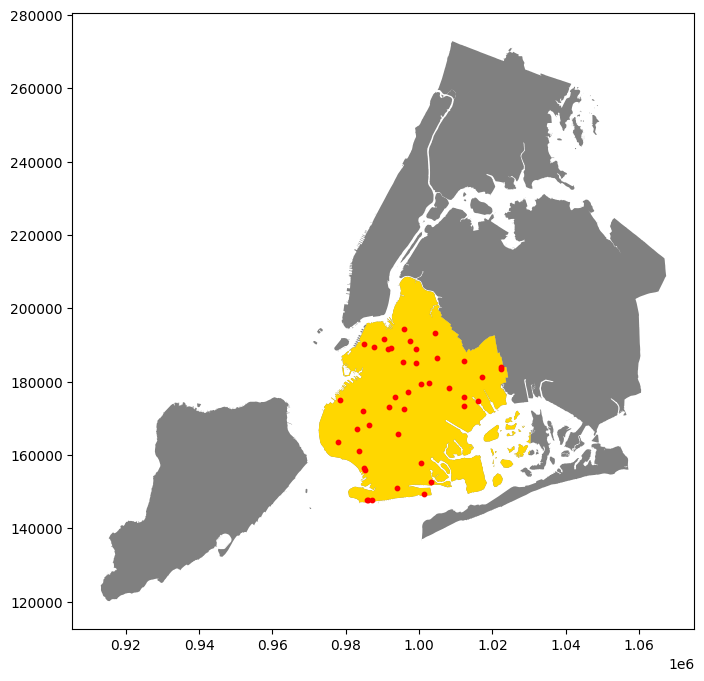

In [46]:
# let's do some visualisation

# Create a figure with one subplot
fig, ax = plt.subplots(figsize=(15,8))

# Plot the whole area
nybb_2263.plot(ax=ax, color='grey')

# brooklyn, we created the GeoDataFrame for it earlier
gdf.plot(ax=ax, color='gold')

# Plot points
brooklyn_nursing_homes.plot(ax=ax, color='red', markersize=10)


# Choropleth Maps

Choropleth maps are a common method of visualising data that is associated with geographic regions. These maps use color to represent the values of a variable within different regions. While choropleth maps are useful for certain applications, they have both advantages and disadvantages.

**Pros:**

* Easy to understand: Choropleth maps are intuitive to understand because they use colour to represent the values of a variable within different regions. This makes them an effective way of conveying information to a broad audience.

* Spatial patterns are easily discernible: Choropleth maps allow spatial patterns to be easily discernible. This is particularly useful when you want to identify the areas with the highest or lowest values for a given variable.

* Suitable for categorical and continuous data: Choropleth maps can be used to represent both categorical and continuous data. In the case of categorical data, the regions are typically coloured according to a predefined set of categories.

**Cons:**

* Vulnerable to bias: Choropleth maps can be vulnerable to bias depending on the choice of colour scheme and classification method. It is important to choose an appropriate colour scheme that accurately reflects the data being displayed.

* Can be misleading: Choropleth maps can be misleading if the underlying data is not normalised or if the regions are not weighted appropriately. It is important to ensure that the data is appropriately scaled and that the regions are comparable.

* May oversimplify complex data: Choropleth maps may oversimplify complex data by reducing it to a single value for each region. This can obscure the underlying complexity of the data and make it more difficult to identify meaningful patterns.

In summary, choropleth maps are an effective way of visualising geographic data, particularly for identifying spatial patterns. However, they require careful consideration of the colour scheme and classification method to avoid bias and ensure accurate representation of the data. Additionally, it is important to be aware of the limitations of choropleth maps and to use them appropriately in the context of more complex data.

In the following we will prepare a dataset for choropleth visualisations and examine the different visualisations.





In [47]:
# installing the necessary package
!pip install mapclassify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


PySAL is an open source cross-platform library for geospatial data science with an emphasis on geospatial vector data written in Python. It supports the development of high level applications for spatial analysis, such as. detection of spatial clusters, hot-spots, and outliers. construction of graphs from spatial data.

In [48]:
!pip install pysal

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.7/243.7 kB 21.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.5/147.5 kB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 36.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.3/50.3 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.2/220.2 kB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.9/112.9 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 58.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━

In [49]:
import seaborn
import pandas
import geopandas as gpd
import pysal
import numpy
import matplotlib.pyplot as plt

Please download mexicojoin shapefile(s) from the `data_share` folder and place them in your google drive.

In [50]:
mexico_fp = '/content/drive/Othercomputers/Laptop/Documents/College/4th-Year/Environmental_Analytics/data_share/Mexico/mexicojoin.shp'

mexico_shp = gpd.read_file(mexico_fp)

In [51]:
mexico_shp.head()

,POLY_ID,AREA,CODE,NAME,PERIMETER,ACRES,HECTARES,PCGDP1940,PCGDP1950,PCGDP1960,...,GR9000,LPCGDP40,LPCGDP50,LPCGDP60,LPCGDP70,LPCGDP80,LPCGDP90,LPCGDP00,TEST,geometry
0,1,7.252751e+10,MX02,Baja California Norte,2040312.385,1.792187e+07,7252751.376,22361.0,20977.0,17865.0,...,0.05,4.35,4.32,4.25,4.40,4.47,4.43,4.48,1.0,"MULTIPOLYGON (((-113.13972 29.01778, -113.2405..."
1,2,7.225988e+10,MX03,Baja California Sur,2912880.772,1.785573e+07,7225987.769,9573.0,16013.0,16707.0,...,0.00,3.98,4.20,4.22,4.39,4.46,4.41,4.42,2.0,"MULTIPOLYGON (((-111.20612 25.80278, -111.2302..."
2,3,2.731957e+10,MX18,Nayarit,1034770.341,6.750785e+06,2731956.859,4836.0,7515.0,7621.0,...,-0.05,3.68,3.88,3.88,4.04,4.13,4.11,4.06,3.0,"MULTIPOLYGON (((-106.62108 21.56531, -106.6475..."
3,4,7.961008e+10,MX14,Jalisco,2324727.436,1.967200e+07,7961008.285,5309.0,8232.0,9953.0,...,0.03,3.73,3.92,4.00,4.21,4.32,4.30,4.33,4.0,"POLYGON ((-101.52490 21.85664, -101.58830 21.7..."
4,5,5.467030e+09,MX01,Aguascalientes,313895.530,1.350927e+06,546702.985,10384.0,6234.0,8714.0,...,0.13,4.02,3.79,3.94,4.21,4.32,4.32,4.44,5.0,"POLYGON ((-101.84620 22.01176, -101.96530 21.8..."


In [52]:
mexico_shp.crs

In [53]:
from pyproj import CRS

In [54]:
# the dataset itself does not tell us which CRS it is in,
# but the metadata on the page that offers the download
# explains the CRS.
mexico_shp.crs = CRS.from_epsg(4326).to_wkt()

In [55]:
mexico_shp.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [56]:
# good practice operation
mexico_4326 = mexico_shp.copy()

In [57]:
mexico_4326.shape

(32, 35)

In [58]:
mexico_4326.dtypes

POLY_ID          int64
AREA           float64
CODE            object
NAME            object
PERIMETER      float64
ACRES          float64
HECTARES       float64
PCGDP1940      float64
PCGDP1950      float64
PCGDP1960      float64
PCGDP1970      float64
PCGDP1980      float64
PCGDP1990      float64
PCGDP2000      float64
HANSON03       float64
HANSON98       float64
ESQUIVEL99     float64
INEGI          float64
INEGI2         float64
MAXP           float64
GR4000         float64
GR5000         float64
GR6000         float64
GR7000         float64
GR8000         float64
GR9000         float64
LPCGDP40       float64
LPCGDP50       float64
LPCGDP60       float64
LPCGDP70       float64
LPCGDP80       float64
LPCGDP90       float64
LPCGDP00       float64
TEST           float64
geometry      geometry
dtype: object

### Quantitative Data Classification
Selecting the number of groups into which we want to assign the values in our data, and how each value is assigned into a group can be seen as a classification problem. Data classification considers the problem of partitioning the attribute values into mutually exclusive and exhaustive groups.

To illustrate these considerations, we will examine regional income data for the 32 Mexican states, that the column `PCGDP1940` contains.

In [59]:
mexico_4326[["NAME", "PCGDP1940"]].head()

,NAME,PCGDP1940
0,Baja California Norte,22361.0
1,Baja California Sur,9573.0
2,Nayarit,4836.0
3,Jalisco,5309.0
4,Aguascalientes,10384.0


Let's look at the statistical distribution of this data. This is an important first step as is informs the choice of choropleth map later.

<Axes: xlabel='PCGDP1940', ylabel='Count'>

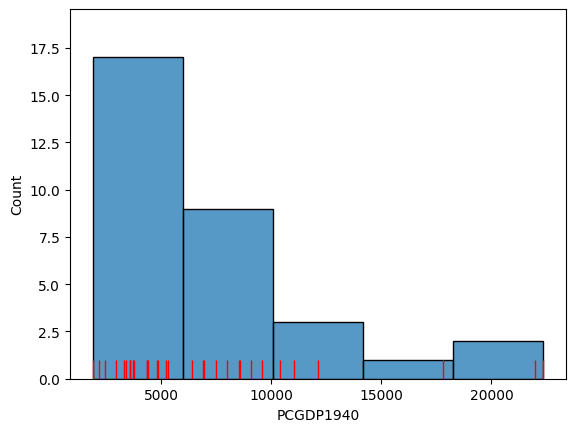

In [60]:
# Plot histogram
ax = seaborn.histplot(mexico_4326["PCGDP1940"], bins=5)
# Add rug on horizontal axis
seaborn.rugplot(mexico_4326["PCGDP1940"], height=0.05, color="red", ax=ax)

As we can see, the distribution is positively skewed as in common in regional income studies. In other words, the mean exceeds the median (50%, in the table below).
The bin of 5 is a common choice, though other bins are possible. Experimentation will tell you if a different bin is necessary. 

A rug plot is a plot of data for a single quantitative variable, displayed as marks along an axis. It is used to visualise the distribution of the data.

The method seaborn.histplot uses the matplotlib hist function under the hood to determine the class boundaries and the counts of observations in each class. In the figure, we have five classes which can be extracted with an explicit call to the hist function.

In [61]:
mexico_4326["PCGDP1940"].describe()

count       32.000000
mean      7230.531250
std       5204.952883
min       1892.000000
25%       3701.750000
50%       5256.000000
75%       8701.750000
max      22361.000000
Name: PCGDP1940, dtype: float64

In [62]:
import mapclassify

There are many different classifiers available. 
As mentioned earlier, the classification scheme that you use majorly impacts the message that your choropleth map is going to tell. So, it is well worth it to spend time on comparing different classifiers and carefully choosing the correct one for your problem.

**Equal Interval**
This is a special case of a more general classifier where each of the bins has the same width in the value space.

In [63]:
# creating an equal intervals classification via mapclassify
equal_inter_5 = mapclassify.EqualInterval(mexico_4326["PCGDP1940"], k=5)
equal_inter_5

EqualInterval

      Interval         Count
----------------------------
[ 1892.00,  5985.80] |    17
( 5985.80, 10079.60] |     9
(10079.60, 14173.40] |     3
(14173.40, 18267.20] |     1
(18267.20, 22361.00] |     2

Note that each of the intervals has equal width of 4093.8.

**Quantiles**
To avoid the potential problem of sparse classes, the quantiles of the distribution can be used to identify the class boundaries. If *k=5* the sample quintiles are used to define the upper limits of each class. A quintile is any of five equal groups into which a population can be divided according to the distribution of values of a particular variable. The first quintile represents the lowest 1/5 of values from 0-20% of the range. The second quintile includes the values from 20-40%, the third quintile includes 40-60%, the fourth quintile includes 60-80%, and the fifth quintile includes the highest 1/5 of values from 80-100%.

In [64]:
quantiles_5 = mapclassify.Quantiles(mexico_4326.PCGDP1940, k=5)
quantiles_5

Quantiles

      Interval         Count
----------------------------
[ 1892.00,  3576.20] |     7
( 3576.20,  4582.80] |     6
( 4582.80,  6925.20] |     6
( 6925.20,  9473.00] |     6
( 9473.00, 22361.00] |     7

Note that while the numbers of values in each class are roughly equal, the widths of the first four intervals are rather different:

In [65]:
quantiles_5.bins[1:] - quantiles_5.bins[:-1]

array([ 1006.6,  2342.4,  2547.8, 12888. ])

While quantiles does avoid the pitfall of sparse classes, this classification is not problem free. The varying widths of the intervals can be markedly different which can lead to problems of interpretation. 

A second challenge facing quantiles arises when there are a large number of duplicate values in the distribution such that the limits for one or more classes become ambiguous. For example, if one had a variable with *n=20* but 10 of the observations took on the same value which was the minimum observed, then for values of *k>2*, the class boundaries become ill-defined since a simple rule of splitting at the *n/k* ranked observed value would depend upon how ties are treated when ranking.

In [66]:
# the unique values in our dataset
ux = numpy.unique(mexico_4326.PCGDP1940)
ux

array([ 1892.,  2181.,  2459.,  2934.,  3327.,  3408.,  3569.,  3605.,
        3734.,  3758.,  4359.,  4372.,  4414.,  4836.,  4840.,  5203.,
        5309.,  6399.,  6909.,  6936.,  7508.,  7990.,  8537.,  8578.,
        9073.,  9573., 10384., 11016., 12132., 17816., 21965., 22361.])

In [67]:
# amount of observations
len(mexico_4326.PCGDP1940)

32

In [68]:
# amount of unique observations
len(ux)

32

We have plenty of unique observations!

**Mean standard deviation**
Our third classifier uses the sample mean and sample standard deviation to define class boundaries as some distance from the sample mean, with the distance being a multiple of the standard deviation. 

In [69]:
mean_stand_dev = mapclassify.StdMean(mexico_4326["PCGDP1940"])
mean_stand_dev

StdMean

      Interval         Count
----------------------------
(    -inf, -3179.37] |     0
(-3179.37,  2025.58] |     1
( 2025.58, 12435.48] |    28
(12435.48, 17640.44] |     0
(17640.44, 22361.00] |     3

This classifier is best used when data is normally distributed or, at least, when the sample mean is a meaningful measure to anchor the classification around. Clearly this is not the case for our income data as the positive skew results in a loss of information when we use the standard deviation. 

**Maximum Breaks**
The maximum breaks classifier decides where to set the break points between classes by considering the difference between sorted values. That is, rather than considering a value of the dataset in itself, it looks at how apart each value is from the next one in the sorted sequence. The classifier then places the the *k-1* break points in between the pairs of values most stretched apart from each other in the entire sequence, proceeding in descending order relative to the size of the breaks.

In [70]:
max_breaks_5 = mapclassify.MaximumBreaks(mexico_4326["PCGDP1940"], k=5)
max_breaks_5

MaximumBreaks

      Interval         Count
----------------------------
[ 1892.00,  5854.00] |    17
( 5854.00, 11574.00] |    11
(11574.00, 14974.00] |     1
(14974.00, 19890.50] |     1
(19890.50, 22361.00] |     2

Maximum breaks is an appropriate approach when we are interested in making sure observations in each class are separated from those in neighboring classes. As such, it works well in cases where the distribution of values is not unimodal. A unimodal distribution only has one peak in the distribution.

In addition, the algorithm is relatively fast to compute. However, its simplicity can sometimes cause unexpected results. To the extent in only considers the top *k-1* differences between consecutive values, other more nuanced within-group differences and dissimilarities can be ignored.

**Box Plot**
The box-plot classification is a blend of the quantile and standard deviation classifiers. Here *k* is predefined to six.

In [71]:
box_plot = mapclassify.BoxPlot(mexico_4326["PCGDP1940"])
box_plot

BoxPlot

      Interval         Count
----------------------------
(    -inf, -3798.25] |     0
(-3798.25,  3701.75] |     8
( 3701.75,  5256.00] |     8
( 5256.00,  8701.75] |     8
( 8701.75, 16201.75] |     5
(16201.75, 22361.00] |     3

**Head Tail**

The head tail algorithm is based on a recursive partitioning of the data using splits around iterative means. The splitting process continues until the distributions within each of the classes no longer display a heavy-tailed distribution in the sense that there is a balance between the number of smaller and larger values assigned to each class.

For data with a heavy-tailed distribution the head tail breaks classifier can be particularly effective.

In [72]:
head_tail = mapclassify.HeadTailBreaks(mexico_4326["PCGDP1940"])
head_tail

HeadTailBreaks

      Interval         Count
----------------------------
[ 1892.00,  7230.53] |    20
( 7230.53, 12244.42] |     9
(12244.42, 20714.00] |     1
(20714.00, 22163.00] |     1
(22163.00, 22361.00] |     1

**Jenks Caspall**

This approach, as well as the following two, tackles the classification challenge from a heuristic perspective, rather than from deterministic one. This algorithm aims to minimise the sum of absolute deviations around class means. 

The approach begins with a prespecified number of classes and an arbitrary initial set of class breaks - for example using quintiles. The algorithm attempts to improve the objective function by considering the movement of observations between adjacent classes. For example, the largest value in the lowest quintile would be considered for movement into the second quintile, while the lowest value in the second quintile would be considered for a possible move into the first quintile. The candidate move resulting in the largest reduction in the objective function would be made, and the process continues until no other improving moves are possible. The Jenks Caspall algorithm is the one-dimension case of the widely used K-Means algorithm for clustering.

In [73]:
numpy.random.seed(12345)
jenks_caspall_5 = mapclassify.JenksCaspall(mexico_4326["PCGDP1940"], k=5)
jenks_caspall_5

JenksCaspall

      Interval         Count
----------------------------
[ 1892.00,  2934.00] |     4
( 2934.00,  4414.00] |     9
( 4414.00,  6399.00] |     5
( 6399.00, 12132.00] |    11
(12132.00, 22361.00] |     3

**Fisher Jenks**
The second optimal algorithm adopts a dynamic programming approach to minimise the sum of the absolute deviations around class medians. 

In contrast to the Jenks-Caspall approach, Fisher-Jenks is guaranteed to produce an optimal classification for a prespecified number of classes.

In [74]:
numpy.random.seed(12345)
fisher_jenks_5 = mapclassify.FisherJenks(mexico_4326["PCGDP1940"], k=5)
fisher_jenks_5

FisherJenks

      Interval         Count
----------------------------
[ 1892.00,  5309.00] |    17
( 5309.00,  9073.00] |     8
( 9073.00, 12132.00] |     4
(12132.00, 17816.00] |     1
(17816.00, 22361.00] |     2

### Comparing Classification Schemes

As a special case of clustering, the definition of the number of classes and the class boundaries pose a problem to the map designer. 

This notion of statistical fit is an important one. However, it is not the only consideration when evaluating classifiers for the purpose of choropleth mapping. Also relevant is the spatial distribution of the attribute values and the ability of the classifier to convey a sense of that spatial distribution. 

This is not necessarily directly related to the statistical distribution of the attribute values. We will return to a joint consideration of both the statistical and spatial distribution of the attribute values in comparison of classifiers below.

For map classification, a common optimality criterion is a measure of fit. In mapclassify, the “absolute deviation around class medians” (ADCM) is calculated and provides a measure of fit that allows for comparison of alternative classifiers for the same value of *k*. The ADCM will give us a sense of how “compact” each group is. To see this, we can compare different classifiers for *k=5* on the Mexico data:

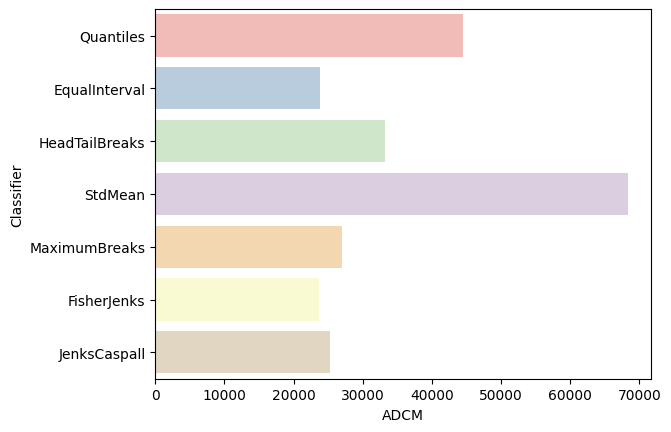

In [75]:
# Bunch classifier objects
class5 = quantiles_5, equal_inter_5, head_tail, mean_stand_dev, max_breaks_5, fisher_jenks_5, jenks_caspall_5
# Collect ADCM for each classifier
fits = numpy.array([c.adcm for c in class5])
# Convert ADCM scores to a DataFrame
adcms = pandas.DataFrame(fits)
# Add classifier names
adcms["classifier"] = [c.name for c in class5]
# Add column names to the ADCM
adcms.columns = ["ADCM", "Classifier"]
ax = seaborn.barplot(
    y="Classifier", x="ADCM", data=adcms, palette="Pastel1"
)

A lower value is considered the best option.

The Fisher-Jenks classifier dominates all other *k=5*  classifiers with an ADCM of 23,729.

Interestingly, the equal interval classifier performs well despite the problems associated with being sensitive to the extreme values in the distribution. 

The mean-standard deviation classifier has a very poor fit due to the skewed nature of the data and the concentrated assignment of the majority of the observations to the central class.

The ADCM provides a global measure of fit which can be used to compare the alternative classifiers. As a complement to this global perspective, it can be revealing to consider how each of the observations in our data was classified across the alternative approaches. To do this we can add the class bin attribute (yb) generated by the mapclassify classifiers as additional columns in the dataframe to visualise how they map to observations:

In [76]:
# Append class values as a separate column
mexico_4326["Quantiles"] = quantiles_5.yb
mexico_4326["Mean Standard Deviation"] = mean_stand_dev.yb
mexico_4326["Equal Interval"] = equal_inter_5.yb
mexico_4326["Head-Tail Breaks"] = head_tail.yb
mexico_4326["Maximum Breaks"] = max_breaks_5.yb
mexico_4326["Fisher-Jenks"] = fisher_jenks_5.yb
mexico_4326["Jenks Caspall"] = jenks_caspall_5.yb

With those in one place, we can display their labels in a heatmap. 

Since our variable of interest is continuous, we can sort the rows of the table by their value (.sort_values('PCGDP1940')) and colour each cell according to the label assigned to it by each classifier. 

To make the heatmap easier to read, we transpose it (.T) so Mexican states are displayed along the horizontal axis and classification schemes are along the vertical one.

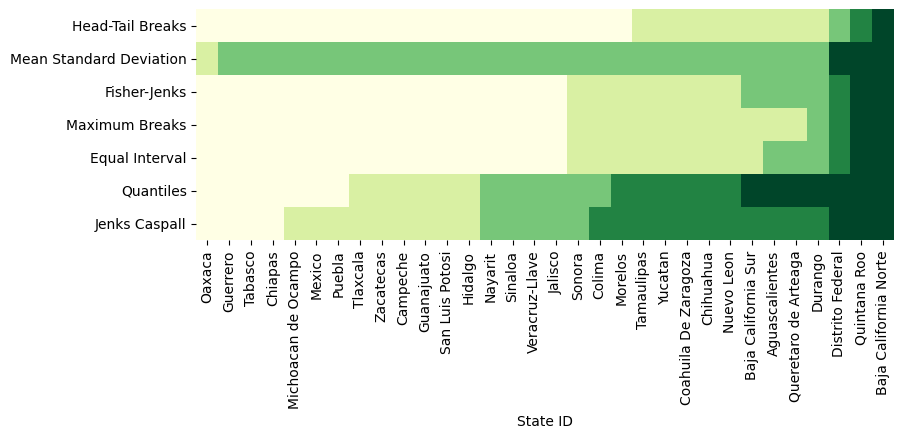

In [77]:
f, ax = plt.subplots(1, figsize=(9, 3))
seaborn.heatmap(
    mexico_4326.set_index("NAME")
    .sort_values("PCGDP1940")[
        [
            "Head-Tail Breaks",
            "Mean Standard Deviation",
            "Fisher-Jenks",
            "Maximum Breaks",
            "Equal Interval",
            "Quantiles",
            "Jenks Caspall",
        ]
    ]
    .T,
    cmap="YlGn",
    cbar=False,
    ax=ax,
)
ax.set_xlabel("State ID");

The figure contains a lot of information, so it is worthwhile to spend some time in understanding it. 

Each row includes a full series of all of our data, classified by an algorithm, with the group to which it has been assigned encoded on a colour scale from light yellow (lowest value group) to dark green (largest value group). 

Each column represents how a given state is classified across the different schemes considered. 

There are a number of interesting results:
* The only Mexican state that is treated consistently across the *k=5* classifiers is Baja California Norte which is placed in the highest class by all classifiers. 
* The mean-standard deviation classifier has an empty first class due to the inadmissible upper bound and the over-concentration of values in the central class (no need to understand the statistics talk here in depth, I just include it for completeness).

## Colour Choices

Together with the choice of classifier, the colour choices will determine the overall effectiveness of the choropleth map in representing the spatial distribution of the attribute values.

Prior to examining the attribute values it is important to note that, as we will see in the figures below, the spatial units for these states are far from homogeneous in their shapes and sizes. This can have major impacts on our brain’s pattern recognition capabilities as we tend to be drawn to the larger polygons, even though they might not be the most relevant one for our analysis. Yet, when we considered the statistical distribution above, each observation was given equal weight. Thus, the spatial distribution becomes more complicated to evaluate from a visual and statistical perspective.

The choice of a colour scheme for a choropleth map should be based on the type of variable under consideration. Generally, a distinction is drawn between three types of numerical attributes: 
* sequential, 
* diverging, and 
* qualitative. 

We will examine the impact in the following.

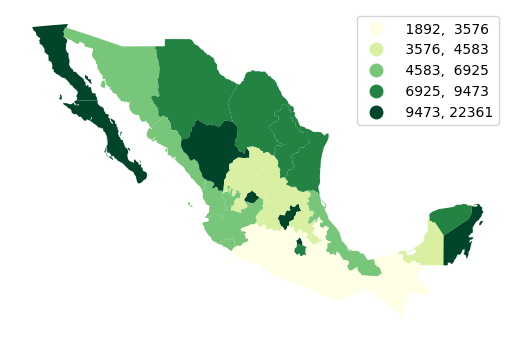

In [78]:
# a Quantile map

ax = mexico_4326.plot(
    column="PCGDP1940",  # Data to plot
    scheme="Quantiles",  # Classification scheme
    cmap="YlGn",  # Color palette
    legend=True,  # Add legend
    legend_kwds={"fmt": "{:.0f}"},  # Remove decimals in legend
)
ax.set_axis_off();

The default colour map used by geopandas is viridis, which is a multi-hue sequential scheme but, for this example, we pick the yellow to green scale from `Color Brewer`. We also specify a legend, and format it for legibility so that there are no decimals and it reads cleaner.

Sequential colour schemes are appropriate for continuous data where the origin is in one end of the series. The `PCGDP1940` column we have been using so far is a good example. 

In these cases, we want a palette that encodes this feature in its choice of colours. Sequential palettes use a gradient of colours from an origin colour to a destination colour. Sequential palettes can also have a shades of a single colour. For example, the “blues” palette in `Color Brewer` is a great choice too:

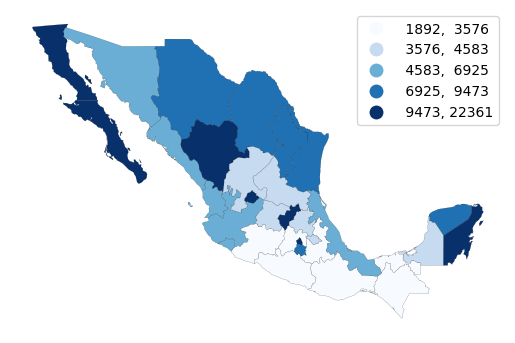

In [79]:
# Quantiles using sequential blues

ax = mexico_4326.plot(
    column="PCGDP1940",  # Data to plot
    scheme="Quantiles",  # Classification scheme
    cmap="Blues",  # Color palette
    edgecolor="k",  # Borderline color
    linewidth=0.1,  # Borderline width
    legend=True,  # Add legend
    legend_kwds={
        "fmt": "{:.0f}"
    },  # Remove decimals in legend (for legibility)
)
ax.set_axis_off();

**Qualitative Paletts**

Qualitative palettes encode categorical data. In this case, colours do not follow a gradient but rather imply qualitative differences between classes. That is, observations in one group are not more or less, above or below those in other groups, rather just different.

The Mexico data set also has several variables that are on a nominal measurement scale. 

In a nominal scale the numbers serve as “tags” or “labels” to classify or identify the objects. A nominal scale usually deals with the non-numeric variables or the numbers that do not have any value.

One of these is a region definition variable that groups individual states in contiguous clusters of similar characteristics:

In [80]:
mexico_4326["HANSON98"].head()

0    1.0
1    2.0
2    2.0
3    3.0
4    2.0
Name: HANSON98, dtype: float64

This aggregation scheme partitions Mexico into five regions, recorded with the numbers one to five in the table. 


An **incorrect** way to display this would be to treat the region variable as sequential:

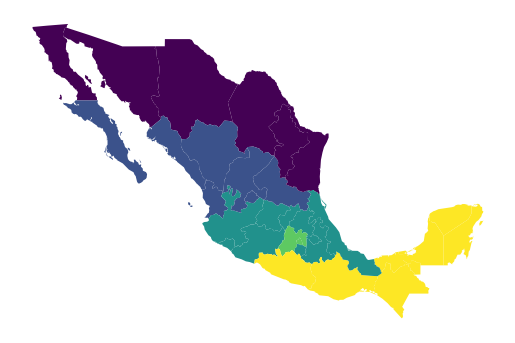

In [81]:
ax = mexico_4326.plot("HANSON98")
ax.set_axis_off();

This is not correct because the region variable is not on an interval scale. This means that the differences between the values have no quantitative significance but rather the values simply indicate region membership. 

However, the choropleth above gives a clear visual cue that regions in the south have larger values than those in the north, as the color map implies an intensity gradient.

A more appropriate visualisation is to use a “qualitative” colour palette, which is used if you specify that the variable is categorical:

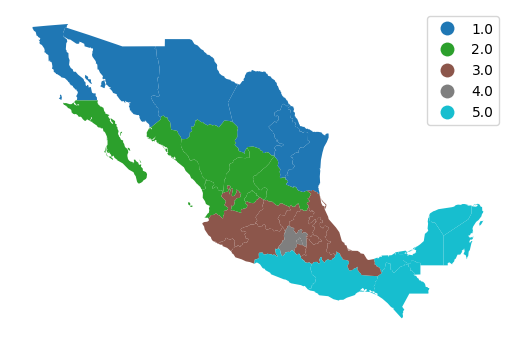

In [82]:
ax = mexico_4326.plot("HANSON98", categorical=True, legend=True)
ax.set_axis_off();